# Cónicas

Empecemos por importar los módulos y establecer algunas propiedades estéticas:

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['k'])

Para los siguientes ejemplos usaremos el mismo plano que se muestra a continuación:

In [0]:
x = np.linspace(-9, 9, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

Tenga en cuenta que numpy.meshgrid crea una rejilla que replica el primer array horizontalmente y el segundo verticalmente, de la misma manera que la rejilla de MATLAB. No confundir con numpy.mgrid, que resultará en una malla transpuesta.

Para simplificar nuestros ejemplos, definamos una función para trazar los ejes de origen:

In [0]:
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

## Parabolas
Ecuación estándar de la parábola:
$$ y^2 = 4px, \quad p>0 $$
Usando matplotlib.pyplot.contour podemos dibujar una parábola en posición estándar como:

In [0]:
p = 0.3
axes()
plt.contour(x, y, (y**2 - 4*p*x), [0], colors='k')
plt.show()

Focos y directrices:

In [0]:
axes()
plt.contour(x, y, (y**2 - 4*p*x), [0], colors='k', alpha=.1)
# Foco
plt.plot(p, 0, '.')
# Directriz
plt.axvline(-p)
plt.show()

Parábola en posición no estándar:

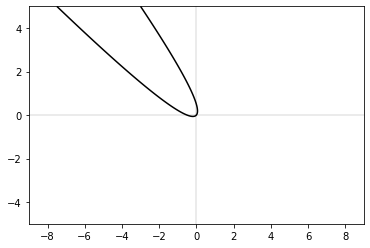

In [0]:
a, b, c, d, e, f = 1, -2, 1, 2, 2, -10
assert b**2 - 4*a*c == 0
axes()
plt.contour(x, y,(2*x**2 + 4*x*y + 2*y**2 + x - y), [0], colors='k')
plt.show()

## Elipses
Ecuación estándar de la elipse:
$$ \frac{x^2}{x^2} + \frac{y^2}{b^2} = 1, \quad a,b > 0. $$

Caso $a=b$

In [0]:
a = 2
b = 2
axes()
plt.contour(x, y,(x**2/a**2 + y**2/b**2), [1], colors='k')
plt.show()

Caso $a \neq b$

In [0]:
a = 4
b = 2
axes()
plt.contour(x, y,(x**2/a**2 + y**2/b**2), [1], colors='k')
plt.show()

Foco y directrices:

In [0]:
axes()
plt.contour(x, y,(x**2/a**2 + y**2/b**2), [1], colors='k', alpha=.1)
# Excentricidad
e = np.sqrt(1 - b**2/a**2)
# Focos
plt.plot(a*e, 0, '.', -a*e, 0, '.')
# Directrices
plt.axvline(a/e)
plt.axvline(-a/e)
plt.show()

Elipse en posición no estándar:

In [0]:
a, b, c, d, e, f = 4, -5, 2, 4, -3, -3
assert b**2 - 4*a*c < 0
axes()
plt.contour(x, y,(a*x**2 + b*x*y + c*y**2 + d*x + e*y + f), [0], colors='k')
plt.show()

## Hipérbolas
Ecuación estándar de la hipérbola:
$$ \frac{x^2}{x^2} - \frac{y^2}{b^2} = 1, \quad a,b > 0. $$

In [0]:
a = 2
b = 1
axes()
plt.contour(x, y,(x**2/a**2 - y**2/b**2), [1], colors='k')
plt.show()

Foco, directrices y asíntotas:

In [0]:
axes()
plt.contour(x, y,(x**2/a**2 - y**2/b**2), [1], colors='k', alpha=.1)
# Excentricidad
e = np.sqrt(1 + b**2/a**2)
# Focos
plt.plot(a*e, 0, '.', -a*e, 0, '.')
# Directrices
plt.axvline(a/e)
plt.axvline(-a/e)
# Asíntotas
plt.plot(x[0,:], b/a*x[0,:], '--')
plt.plot(x[0,:], -b/a*x[0,:], '--')
plt.show()

Hipérbola en posición no estándar:

In [0]:
a, b, c, d, e, f = 1, -3, 1, 1, 1, 1
assert b**2 - 4*a*c > 0
axes()
plt.contour(x, y,(a*x**2 + b*x*y + c*y**2 + d*x + e*y + f), [0], colors='k')
plt.show()

## Transformación de Cónicas

A continuación veremos algunas manera de transformar ecucaiones de cónicas. Por ejemplo, rotar por un ángulo adecuado los ejes coordenados para escribir de manera canónica la ecuación general de alguna cónica. 

Recordemos que dado un ángulo $\theta$ Si los ejes coordenados giran un ángulo $\theta$ en torno de su origen como centro de rotación , y las coordenadas de un punto cualquiera antes después de la rotación son $(x , y)$ y $(x_1 , y_1)$, respectivamente, las ecuaciones de transformación del sistema original al nuevo sistema de coordenadas están dadas por
$$ x = x_1\,cos(\theta) - y_1\,sin(\theta), $$
$$ y = x_1\,sin(\theta) + y_1\,cos(\theta). $$

Podemos implementar este cambio de coordenadas en `Sympy` como sigue: 

In [0]:
import sympy as sym

x, y = sym.symbols('x y')

def rotacion(expresion, angulo):
    x1, y1 = sym.symbols('x1 y1')
    sym_expresion = sym.sympify(expresion)
    subs_sym_expresion = sym_expresion.subs({x: x1*sym.cos(sym.sympify(angulo)) - y1*sym.sin(sym.sympify(angulo)), y: x1*sym.sin(sym.sympify(angulo)) + y1*sym.cos(sym.sympify(angulo))})
    return sym.radsimp(sym.simplify(subs_sym_expresion))

### Ejemplo

Transformemos la ecuación
$$ x + y = 0$$ 
girando los ejes coordenados un ángulo $\theta = \frac{\pi}{2}$:

In [0]:
rot_expresion = rotacion('x + y', 'pi/2')
print(rot_expresion, '= 0')

x1 - y1 = 0


## Elipse

Transformar la ecuación de la elipse
$$ 2x^2 + \sqrt{3}xy + y^2 - 4 = 0 $$
girando los ejes coordenados un ángulo $\theta = \frac{\pi}{6}$:

In [0]:
rot_expresion = rotacion('2*x**2 + sqrt(3)*x*y + y**2 - 4', 'pi/6')
print(rot_expresion, '= 0')

(5*x1**2 + y1**2)/2 - 4 = 0


## Parábola

Transformar la ecuación de la parábola
$$ 2x^2 + 4xy + 2y^2 + 11.31x - 11.31y = 0 $$
girando los ejes coordenados un ángulo $\theta = \frac{3\pi}{4}$:

In [0]:
rot_expresion = rotacion('2*x**2 + 4*x*y + 2*y**2 + x - y', '3*pi/4')
print(rot_expresion, '= 0')

-sqrt(2)*x1 + 4*y1**2 = 0


## Hipérbola

Transformar la ecuación de la hipérbola
$$ 16x^2 - 9y^2 + 144 = 0 $$
girando los ejes coordenados un ángulo $\theta = \frac{\pi}{2}$:

In [0]:
rot_expresion = rotacion('16*x**2 - 9*y**2 + 144', 'pi/2')
print(rot_expresion, '= 0')

-9*x1**2 + 16*y1**2 + 144 = 0


# Ecuación General de la Parábola

In [0]:
from sympy import symbols
import sympy as sym

x, y = symbols('x y')
p = 4
h, k = -1, 2

# Ecuación genereal de la parábola
ec_general_parabola = sym.factor((y - k)**2 - 4*p*(x - h))
print(ec_general_parabola, '= 0')

-16*x + y**2 - 4*y - 12 = 0


In [0]:
V = (h, k)
print(f'Las coordenadas del vértice son:\n V = {V}')

print()

F = (h + p, k)
print(f'Las coordenadas del foco son:\n F = {F}')

Las coordenadas del vértice son:
 V = (-1, 2)

Las coordenadas del foco son:
 F = (3, 2)


In [0]:
print(f'La ecuación de la directriz es:\n {sym.simplify(x - h + p)} = 0')

La ecuación de la directriz es:
 x + 5 = 0


# Ecuación General de la Elipse

In [3]:
from sympy import symbols
import sympy as sym

x, y = symbols('x y')
h, k = -1, 2

a, c  = 5, 3
b = sym.sqrt(a**2 - c**2)
e = c/a


#Elipse con eje mayor paralelo al Eje-X
ec_general_elipse = sym.factor(a**2 * b**2 * ((x - h)**2/a**2 + (y - k)**2/b**2 - 1))
print(ec_general_elipse, '= 0')

16*x**2 + 32*x + 25*y**2 - 100*y - 284 = 0


In [0]:
V1, V2 = (h + a, k), (h - a, k)
F1, F2 = (h + c, k), (h - c, k)

print(f'Los vértices de la elipse son:\n V1 = {V1}\n V2 = {V2}')
print()
print(f'Los focos de la elipse son:\n F1 = {F1}\n F2 = {F2}')

In [0]:
print('La excentricidad de la Elipse es: ', e ,'\n')
print('Las ecuaciones de las directrices son:','\n')
print(f'{sym.simplify(e*(x - h) - a)} = 0\n{sym.simplify(e*(x - h) + a)} = 0')

# Ecuación General de la Hipérbola

In [0]:
from sympy import symbols
import sympy as sym

x, y = symbols('x y')
h, k = -1, 2

a, c  = 3, 5
b = sym.sqrt(a**2 + c**2)
e = c/a 


# Hipérbola con eje principal horizontal
sym.factor(a**2 * b**2*((x - h)**2/a**2 - (y - k)**2/b**2 - 1))

In [0]:
V1, V2 = (h + a, k), (h - a, k)
F1, F2 = (h + c, k), (h - c, k)

print(f'Los vértices de la elipse son:\n V1 = {V1}\n V2 = {V2}')
print()
print(f'Los focos de la elipse son:\n F1 = {F1}\n F2 = {F2}')

In [0]:
print('La excentricidad de la Elipse es: ', e ,'\n')
print('Las ecuaciones de las directrices son:')
print(f'{sym.simplify(e*(x - h) - a)} = 0\n{sym.simplify(e*(x - h) + a)} = 0')

## Determinar Cónicas y sus Características

In [0]:
import sympy as sym7

def conic(equation):
    x, y = sym.symbols('x y')
    sym_eqn = sym.sympify(equation)
    grad_eqn = sym.derive_by_array(sym_eqn, (x, y))
    hess_eqn = sym.derive_by_array(grad_eqn, (x, y))
    AA = sym.Rational(1,2)*hess_eqn[0, 0]
    BB = hess_eqn[0, 1]
    CC = sym.Rational(1,2)*hess_eqn[1, 1]
    DD = grad_eqn[0].subs({x: 0, y: 0})
    EE = grad_eqn[1].subs({x: 0, y: 0})
    FF = sym_eqn.subs({x: 0, y: 0})
    discriminant = BB**2 - 4*AA*CC
    if discriminant == 0:
        return f'Parábola vértice {-DD/(2*AA), (1/EE)*(DD**2/(4*AA) - FF)}, con foco {-DD/(2*AA), (1/EE)*(DD**2/(4*AA) - FF) - EE/(4*AA)} y directriz y = {(1/EE)*(DD**2/(4*AA) - FF) + EE/(4*AA)}'
    elif discriminant < 0:
        if AA == CC:
            indicator = (DD/AA)**2 + (EE/AA)**2 - 4*(FF/AA)
            if  indicator > 0:
                return f'Círculo con centro {-DD/(2*AA), -EE/(2*AA)} y radio {sym.Rational(1,2)*sym.sqrt(indicator)}'
            elif indicator == 0:
                return f'Punto {-DD/(2*AA),-EE/(2*AA)}'
            else:
                return f'No representa lugar geométrico real'
        return f'Elipse con centro {-DD/(2*AA), -EE/(2*CC)}, vértices {-DD/(2*AA) - sym.sqrt(CC), -EE/(2*CC)} y {-DD/(2*AA) + sym.sqrt(CC), -EE/(2*CC)}, focos {-DD/(2*AA) - sym.sqrt(CC- AA), -EE/(2*CC)} y {-DD/(2*AA) + sym.sqrt(CC - AA), -EE/(2*CC)}'
    elif discriminant > 0:
        return f'Hipérbola con centro {-DD/(2*AA), -EE/(2*CC)}, con vértices {-DD/(2*AA), -EE/(2*CC) - sym.sqrt(-CC)} y {-DD/(2*AA), -EE/(2*CC) + sym.sqrt(-CC)}, focos {-DD/(2*AA), -EE/(2*CC) - sym.sqrt(AA - CC)} y {-DD/(2*AA), -EE/(2*CC) + sym.sqrt(AA - CC)}'
    else:
        return f'Cónica Degenerada'


In [0]:
# EJEMPLO 1
conic('2*x**2 + 2*y**2 - 10*x + 6*y - 15')

In [0]:
# EJEMPLO 2
conic('36*x**2 + 36*y**2 + 48*x - 108*y + 97')

In [0]:
# EJEMPLO 3
conic('x**2 + y**2 - 8*x + 6*y + 29')

In [0]:
# EJEMPLO 4
conic('x**2 + 4*y**2 + 2*x - 12*y + 6')

In [0]:
# EJEMPLO 5
conic('4*x**2 - 20*x - 24*y + 97')

In [0]:
# EJEMPLO 6
conic('4*x**2 - 9*y**2 - 24*x + 18*y - 9')

**NOTA.** Es posible modificar la función `conic` para que admita ecuaciones cuadráticas en dos variables con término mixto $xy$:

In [0]:
def general_conic(equation):
    x, y = sym.symbols('x y')
    sym_eqn = sym.sympify(equation)
    grad_eqn = sym.derive_by_array(sym_eqn, (x, y))
    hess_eqn = sym.derive_by_array(grad_eqn, (x, y))
    AA = sym.Rational(1,2)*hess_eqn[0, 0]
    BB = hess_eqn[0, 1]
    CC = sym.Rational(1,2)*hess_eqn[1, 1]
    DD = grad_eqn[0].subs({x: 0, y: 0})
    EE = grad_eqn[1].subs({x: 0, y: 0})
    FF = sym_eqn.subs({x: 0, y: 0})
    discriminant = BB**2 - 4*AA*CC
    if discriminant == 0:
        return f'Parábola'
    elif discriminant < 0:
        if AA == CC:
            return f'Círculo'
        return f'Elipse'
    elif discriminant > 0:
        return f'Hipérbola'
    else:
        return f'Cónica Degenerada'